## Welcome! 

For this assigment dealing with animals, __I will create a fun wordcloud in order to visualize the commonality of dog breeds in Zurich, Switzerland__. 

## Imports

In [1]:
# we'll need a few special imports, in addition to the usual ones: 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS

## Dataset

For our purposes here, I've downloaded a dataset __describing dogs in Zurich, Switzerland__. The column names are in German, but the descriptions of the dataset provided by the curator can resolve this issue. 

Source: https://www.kaggle.com/kmader/dogs-of-zurich

In [2]:
data = pd.read_csv("doggo_data.csv")
data

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,135718,31-40,m,9.0,91.0,Mischling gross,NaN,NaN,NaN,I,2015,w,golden
7151,135725,31-40,w,7.0,74.0,Boxer,NaN,NaN,NaN,I,2016,w,gelb/weiss
7152,135726,11-20,w,11.0,111.0,Pinscher,NaN,NaN,NaN,K,2016,w,schwarz
7153,135728,31-40,w,7.0,72.0,Whippet,NaN,NaN,NaN,I,2016,w,vierfarbig


### Explanation of the columns, borrowed from the dataset's webpage: 

* ALTER -> Age
* GESCHLECHT -> Gender
* STADTKREIS -> City Quarter or District
* RASSE1 -> Dog's Primary Breed
* RASSE2 -> Dog's Secondary Breed
* GEBURTSJAHR_HUND -> Dog's Year of Birth
* GESCHLECHT_HUND -> Dog's Gender
* HUNDEFARBE -> Dog's Color

"HALTER_ID" Is simply the ID of the dog's owner. 

## Inspect the Dataset

Before any visualization, we should quickly inspect the dataset, and look at what primary dog breeds in the dataset are most common (this will give us a good idea of what the wordcloud will look like). 

In [91]:
# how many columns have missing data? 
data.isnull().any() # quite a few. 

HALTER_ID           False
ALTER                True
GESCHLECHT          False
STADTKREIS           True
STADTQUARTIER        True
RASSE1              False
RASSE1_MISCHLING     True
RASSE2               True
RASSE2_MISCHLING     True
RASSENTYP           False
GEBURTSJAHR_HUND    False
GESCHLECHT_HUND     False
HUNDEFARBE          False
dtype: bool

In [10]:
# what are the most common primary dog breeds? 
data["RASSE1"].value_counts()

Mischling klein           620
Chihuahua                 516
Labrador Retriever        439
Yorkshire Terrier         298
Jack Russel Terrier       290
                         ... 
Chinese Foo Dog             1
Wäller                      1
Curly Coated Retriever      1
Cirneco dell'Etna           1
Elo                         1
Name: RASSE1, Length: 304, dtype: int64

__What can we discern?__

We know, from the count of primary dog breeds, that Mischling Klein (meaning "small mix" in English) is the most common primary breed. There are a total of 304 primary breeds accounted for in the dataset. 

## Making the Wordcloud

As you will soon see, the wordcloud library makes generating wordclouds very, very easy. Please note that, in order to create my wordcloud, I take inspiration from https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32. 

In [19]:
# re-organize the words
alldogs = "".join(list(data["RASSE1"].values)) # the wordcloud generator preffers single strings. 

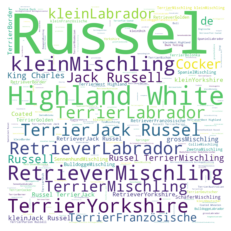

In [31]:
# first, let's create a basic wordcloud. We can customize it later on. 
wc = WordCloud(background_color="white", 
               max_words=1000,
               max_font_size=256,
               random_state=42, 
               width=1000, 
               height=1000)
wc.generate(alldogs)
plt.imshow(wc, interpolation="bilinear")

plt.axis('off')
plt.show()

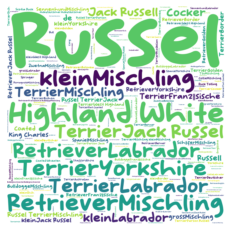

In [32]:
# we can futher customize our worldloud by changing the font
wc = WordCloud(background_color="white", 
               max_words=1000,
               font_path="font/Stop Bullying.ttf", # the font's name is "stop bullying". It and other fonts can be found here https://www.dafont.com/theme.php?cat=101
               max_font_size=256,
               random_state=42, 
               width=1000, 
               height=1000)
wc.generate(alldogs)
plt.imshow(wc, interpolation="bilinear")

plt.axis('off')
plt.show()

In [73]:
# lastly, we can add a mask over the wordcloud to give it a fun shape. 

# modify the mask, converting "0" into "255" (pure white)
mask = np.array(Image.open("doggo.png"))

modified_mask = []
for i in mask:
    new = []
    for j in i: 
        if j == 0: 
            new.append(255)
        else:
            new.append(j)
    modified_mask.append(new)
            
modified_mask = np.array(modified_mask)
modified_mask
            

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

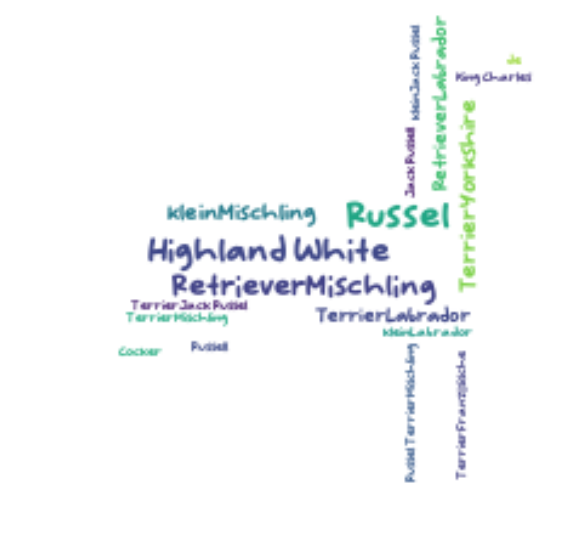

In [90]:
wc = WordCloud(background_color="white", 
               max_words=1000,
               font_path="font/Stop Bullying.ttf", # the font's name is "stop bullying". It and other fonts can be found here https://www.dafont.com/theme.php?cat=101
               mask = modified_mask,
               random_state=42,
               width = modified_mask.shape[1],
               height = modified_mask.shape[0],
               contour_color="steelblue")

wc.generate(alldogs)

plt.figure(figsize=(10,10))
plt.imshow(wc,
           #X = np.array(Image.open("doggo.png")),
           interpolation="bilinear")
plt.axis('off')
plt.show()

Well, the image is vaguely dog-ish. It is not perfect by any means, but it was fun to experiment with the word clouds. 